import libraries

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [17]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [18]:
#normalize
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is:{y_train[0]}")
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"after : label is:{y_train[0]}")


before : label is:[6]
after : label is:[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [20]:
#architecture
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2042 - loss: 2.4830 - val_accuracy: 0.2210 - val_loss: 2.0365
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2383 - loss: 1.9934 - val_accuracy: 0.2615 - val_loss: 1.9641
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2393 - loss: 1.9898 - val_accuracy: 0.2403 - val_loss: 1.9842
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2409 - loss: 1.9817 - val_accuracy: 0.2276 - val_loss: 2.0204
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2422 - loss: 1.9736 - val_accuracy: 0.2484 - val_loss: 1.9464
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2399 - loss: 1.9710 - val_accuracy: 0.2160 - val_loss: 2.0029
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2436 - loss: 1.9725 - val_accuracy: 0.2398 - val_loss: 1.9893
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2473 - loss: 1.9633 - val_accuracy: 0.

In [21]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2385 - loss: 1.9677
test loss:1.9676759243011475
test accuracy:0.23849999904632568
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.20422500371932983, 0.23829999566078186, 0.23925000429153442, 0.24092499911785126, 0.24222500622272491, 0.23989999294281006, 0.243599995970726, 0.24732500314712524, 0.2460000067949295, 0.24892500042915344], [2.48295521736145, 1.9934056997299194, 1.9898275136947632, 1.9816837310791016, 1.973629355430603, 1.9710004329681396, 1.9724857807159424, 1.963334321975708, 1.9667247533798218, 1.9612131118774414], [0.22100000083446503, 0.2615000009536743, 0.2402999997138977, 0.22759999334812164, 0.2484000027179718, 0.2160000056028366, 0.23980000615119934, 0.2508000135421753, 0.2542000114917755, 0.24199999868869781], [2.0364677906036377, 1.9640709161758423, 1.9841562509536743, 2.0203857421875, 1.9464484453201294, 2.002908945083618, 1.9893205165863037, 1.9711030721664429, 1.9430421590805054,

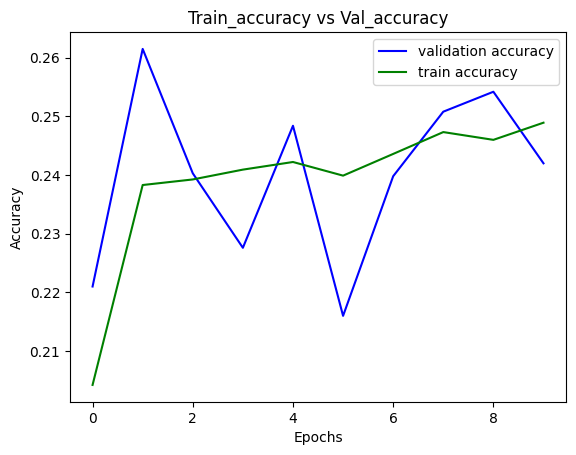

In [22]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

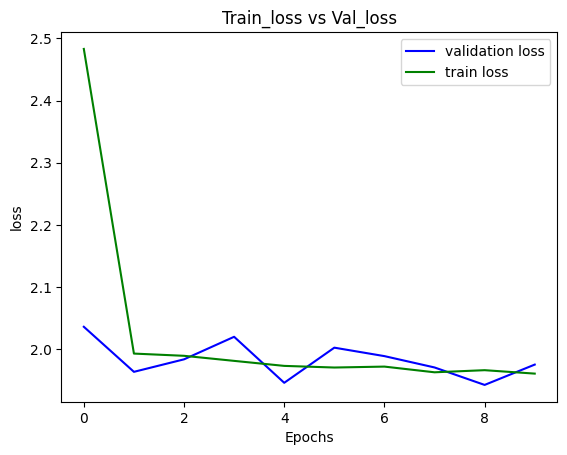

In [23]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [25]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [26]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0996 - loss: 2.6001 - val_accuracy: 0.0981 - val_loss: 2.3032
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0972 - loss: 2.3033 - val_accuracy: 0.1019 - val_loss: 2.3033
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1028 - loss: 2.3031 - val_accuracy: 0.1022 - val_loss: 2.3037
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0984 - loss: 2.3032 - val_accuracy: 0.1004 - val_loss: 2.3036
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1023 - loss: 2.3033 - val_accuracy: 0.0979 - val_loss: 2.3049
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0992 - loss: 2.3031 - val_accuracy: 0.0980 - val_loss: 2.3026
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0980 - loss: 2.3036 - val_accuracy: 0.1022 - val_loss: 2.3030
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0989 - loss: 2.3035 - val_accuracy: 0.

In [28]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1000 - loss: 2.3038
test loss:2.30379319190979
test accuracy:0.10000000149011612


In [29]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2654 - loss: 2.0958 - val_accuracy: 0.3036 - val_loss: 1.9023
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3135 - loss: 1.8707 - val_accuracy: 0.3104 - val_loss: 1.8905
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3221 - loss: 1.8515 - val_accuracy: 0.2959 - val_loss: 1.8561
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3248 - loss: 1.8400 - val_accuracy: 0.3130 - val_loss: 1.8634
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3338 - loss: 1.8214 - val_accuracy: 0.3172 - val_loss: 1.8566
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3358 - loss: 1.8160 - val_accuracy: 0.3390 - val_loss: 1.8421
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3359 - loss: 1.8198 - val_accuracy: 0.3165 - val_loss: 1.8646
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3336 - loss: 1.8183 - val_accuracy: 0.

In [30]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3399 - loss: 1.8115
test loss:1.8114800453186035
test accuracy:0.3398999869823456


In [31]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2224 - loss: 2.0900 - val_accuracy: 0.2389 - val_loss: 1.9883
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2713 - loss: 1.9276 - val_accuracy: 0.2813 - val_loss: 1.9384
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2830 - loss: 1.8999 - val_accuracy: 0.2686 - val_loss: 1.9485
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2953 - loss: 1.8681 - val_accuracy: 0.3048 - val_loss: 1.8591
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2966 - loss: 1.8680 - val_accuracy: 0.2941 - val_loss: 1.8897
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2998 - loss: 1.8544 - val_accuracy: 0.2810 - val_loss: 1.8888
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3005 - loss: 1.8583 - val_accuracy: 0.3006 - val_loss: 1.8739
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3031 - loss: 1.8605 - val_accuracy: 0.

In [32]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3073 - loss: 1.8579
test loss:1.8578510284423828
test accuracy:0.30730000138282776
